In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

Complete attribute documentation

1 age: age in years
2 sex: sex (1 = male; 0 = female)
3 cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5 chol: serum cholestoral in mg/dl
6 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7 restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8 thalach: maximum heart rate achieved
9 exang: exercise induced angina (1 = yes; 0 = no)
10 oldpeak = ST depression induced by exercise relative to rest
11 slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12 ca: number of major vessels (0-3) colored by flourosopy
13 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14 num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing

In [43]:
swiss_heart_data <- read_csv("data/processed.switzerland.data", col_names = FALSE) %>%
        rename(age = X1,
            sex = X2,
            cp = X3,
            trestbps = X4,
            chol = X5,
            fbs = X6,
            restecg = X7,
            thalach = X8,
            exang = X9,
            oldpeak = X10,
            slope = X11,
            ca = X12,
            thal = X13,
            num = X14) %>%
    select(age, trestbps, num, thalach) %>%
    mutate(num = as_factor(num), thalach = as.integer(thalach)) %>%
    filter(trestbps != "?") %>%
    arrange(age)

swiss_heart_data

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_character(),
  X5 = col_double(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)

Warning message:
“Problem with `mutate()` input `thalach`.
ℹ NAs introduced by coercion
ℹ Input `thalach` is `as.integer(thalach)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,trestbps,num,thalach
<dbl>,<chr>,<fct>,<int>
32,95,1,127
34,115,1,154
36,110,1,125
38,105,2,166
38,110,1,156
38,100,0,179
38,115,1,128
38,135,2,150
38,150,1,120


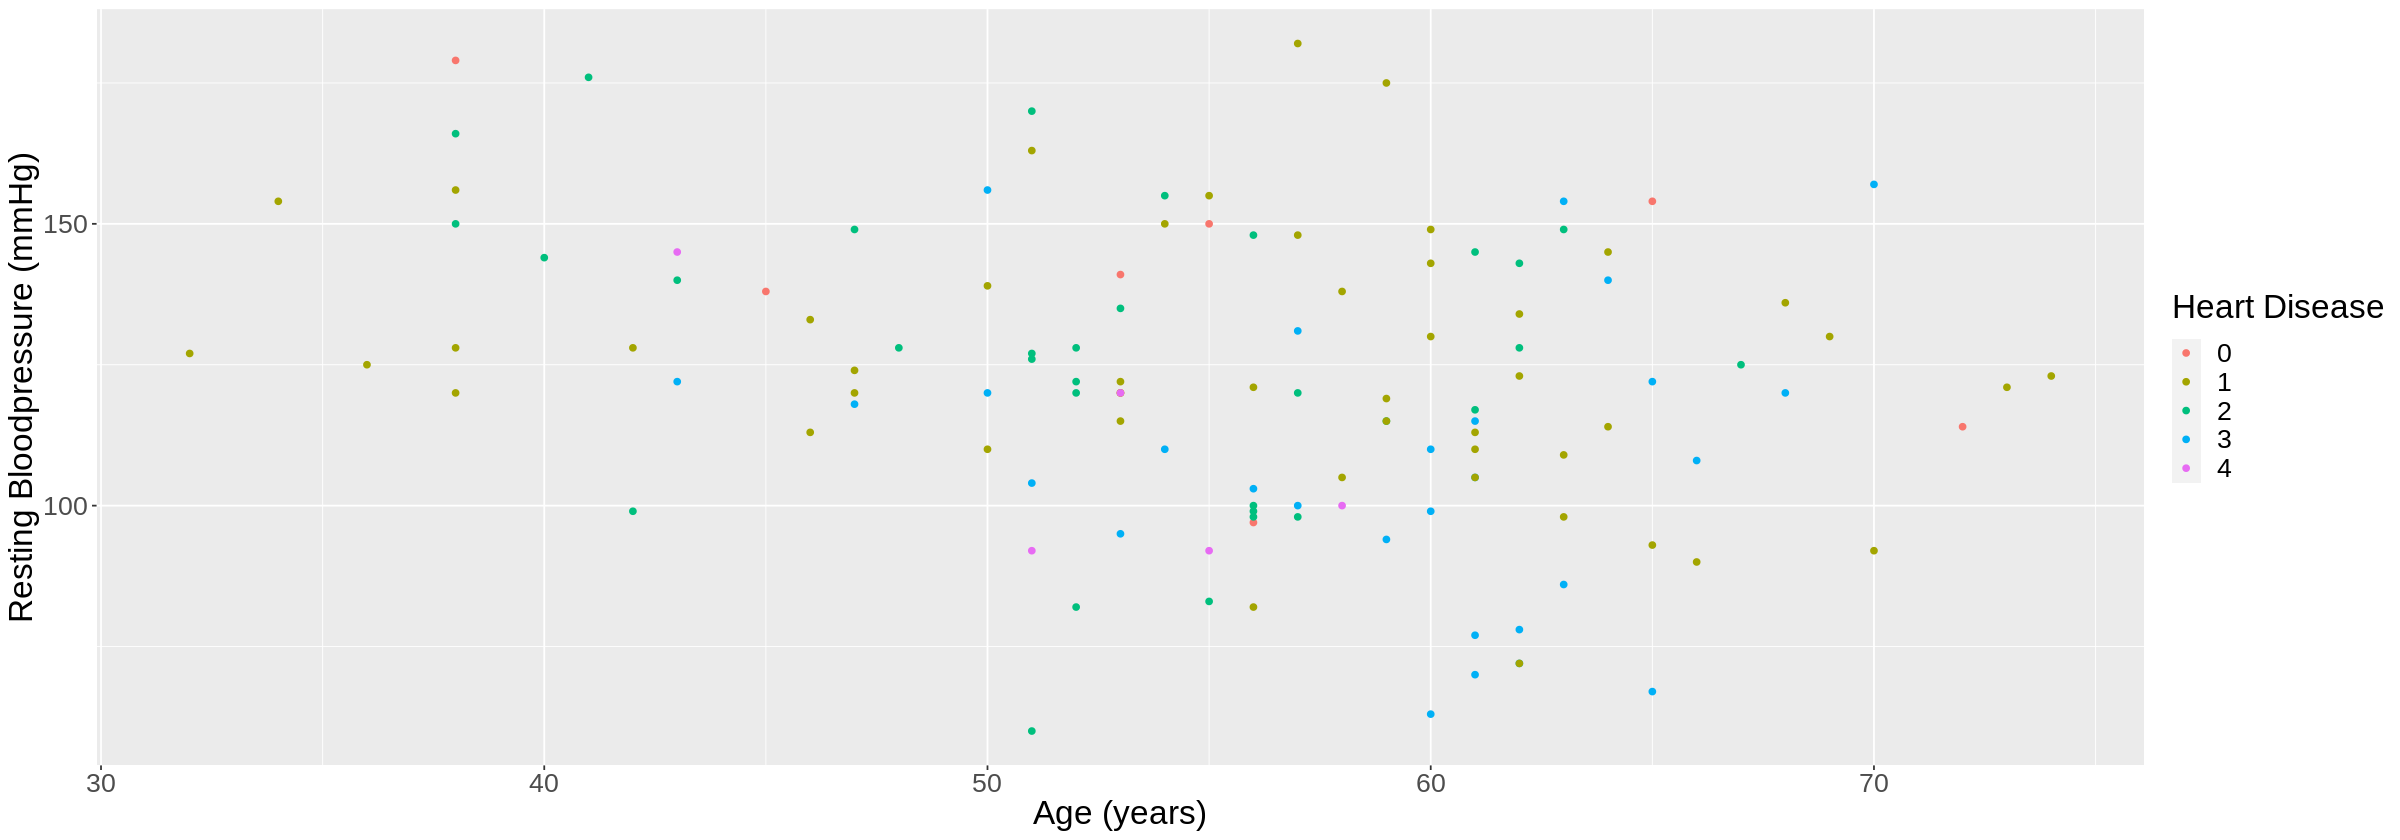

In [44]:
options(repr.plot.length = 20, repr.plot.width = 20)
heart_plot <- swiss_heart_data %>%
    ggplot(aes(x = age, y = thalach, colour = num)) +
    geom_point() +
        labs(x = "Age (years)", y = "Resting Bloodpressure (mmHg)", colour = "Heart Disease") +
    theme(text = element_text(size=20))
                       
heart_plot